This is a notebook detailing the Runge-Kutta method of numerical Differential equations. Set up exactly the same way as the Euler and Improved Euler functions, just running the Runge-Kutta algorithm instead. Some misc testing and plotting was done at the bottom. You can tell just by messing with the step size that this algorithm has tremendously reduced error, as expected.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [52]:
def functionInQuestion(x,y):
    return(5*y-(6*np.exp(-x)))

In [37]:
def rungeKutta(stepSize, initialPair, function, intervalLength):
    y0=initialPair[1]
    x0=initialPair[0]
    
    lasty = y0
    lastx = x0
    
    solutionx = np.array([x0])
    solutiony = np.array([y0])
    iterations = math.floor(intervalLength/stepSize)
    for i in range(iterations):
        k1 = function(lastx,lasty)
        k2 = function(lastx+(stepSize/2), lasty+(stepSize*(k1/2)))
        k3 = function(lastx+(stepSize/2), lasty+(stepSize*(k2/2)))
        k4 = function(lastx+stepSize, lasty+(stepSize*k3))
        
        nexty = lasty+((stepSize/6)*(k1+2*k2+2*k3+k4))
        nextx = lastx+stepSize
        solutionx = np.append(solutionx, [nextx],axis=0)
        solutiony = np.append(solutiony, [nexty],axis=0)
        
        lasty = nexty
        lastx += stepSize
        
    solution = np.array([solutionx, solutiony])
    return(solution)

(0.0, 3.0)

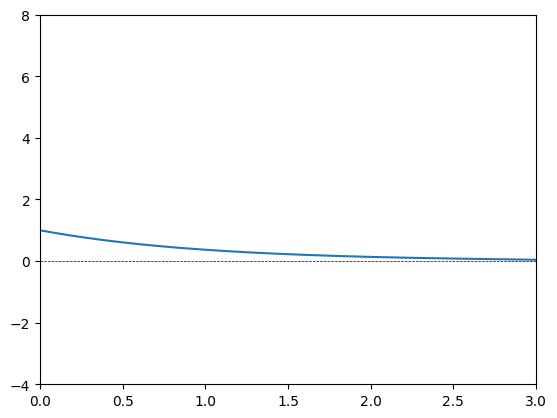

In [55]:
stepSize = 0.01
intervalLength = 3
iterations = math.floor(intervalLength/stepSize)

solution = rungeKutta(stepSize,np.array([0,1]), functionInQuestion, intervalLength)

fig, ax = plt.subplots()

ax.plot(solution[0],solution[1])
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.ylim(-4,8)
plt.xlim(0,3)